# Notebook: MCMC SHAP

This notebook focuses on getting a confidence interval for shapley values.

makes use of https://github.com/slundberg/shap/blob/master/shap/explainers/_sampling.py

## Cases to look at:

negative alpha, positive beta: double potential well
positive alpha, positive beta: single potential well
positive alpha, negative beta: single welled hump


In [1]:
# import libraries

import numpy as np
import pandas as pd
import os
from tqdm import tqdm


from sklearn.preprocessing import MinMaxScaler


from scipy.integrate import odeint
from scipy.fft import fft


import matplotlib.pylab as plt
import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)


import shap as shap

# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True
%matplotlib inline

In [2]:
def eom(u, t, params = {}):
    """
        Duffing Oscillator Equation of Motion

        ddx + delta * dx + alpha * x + beta * x**3 = gamma * cos(omega * t)

        Input
        ----------
        u : vector of length 2, (x,v)
            Position and Velocity at time t
        t : float, the time t

        Parameters
        ----------
        alpha : float, linear stiffness
        beta  : float, non linearity in the restoring force
        gamma : float, amplitude of the periodic driving force
        delta : float, amount of damping
        omega : float, angular frequency of the periodic driving force

        Returns
        ----------
        [dx,ddx] : Tuple, Time derivatives of 
                    position and velocity at time t

    """
    x, dx = u[0], u[1]
    alpha = 3#-1
    ddx = (0.37 * np.cos(1.2 * t) - (1 * dx + (alpha) * x + 1 * x**3))

    return [dx,ddx]

## Plotting Cases

Here we model the potential landscape that the oscillator is in. In order to do so we set the damping term $\delta$ and the driving term $\gamma$ to 0.

The undamped and un-driven Duffing oscillator can be modelled using Jacobi Elliptic functions:

Since the DE is now: $\ddot{x} + \alpha x + \beta x^3$ we know that sn(x) is a solution.

https://link.springer.com/content/pdf/10.1007/s11071-016-2986-8.pdf


The solution to this DE is given by:

$x(t) = -(2 i c_1 \sqrt(\frac{b}{(a - \sqrt(a^2 + 2 b c_1)})) sn(\sqrt(a t^2 + \sqrt(a^2 + 2 b c_1) t^2 + 2 a c_2 t + 2 \sqrt(a^2 + 2 b c_1) c_2 t + a c_2^2 + \sqrt(a^2 + 2 b c_1) c_2^2)/sqrt(2)|(a - \sqrt(a^2 + 2 b c_1))/(a + \sqrt(a^2 + 2 b c_1))))/(\sqrt(a^2 + 2 b c_1) + a)$

In [ ]:
def case_plot():
    

# LIME Explainer

In [ ]:
class LimeExplainer():
    def __init__(self,):
        

# Designing a Numerical Explainer

The first attempt at numerical explainability functions using a central finite differences method to approximate the gradient of the function. The reasoning behind this is that small fluctuations in important features have a greater impact than small fluctuations in less important features.

The second attempt uses a similar idea (the idea that we can look at the volumes that map onto eachother under the function that we are trying to explain).

$f: \mathbb{R}^k \rightarrow \mathbb{R}^d$

$f(\vec{x}) = \vec{y}$

So we define an area $A$ around the target variable $\vec{y}$ using a tolerance $\epsilon$:

$A = \mathcal{B}(\vec{y}, \epsilon)$

Where $\mathcal{B}(\vec{y}, \epsilon)$ is a ball centered on $\vec{y}$ with radius $\epsilon$.

This will become an ellipsoid with major axes $\vec{\delta}$ where the entries in $\vec{\delta}$ are dependent on the feature ranges and variances present in the input data.


Requires inverting f (not possible so either pseudoinverse or monte carlo sample from the intial distribution to see which points end up in the are around y):

$f^{-1}(\mathcal{B}_{\epsilon}( \underline{y} )) = \mathcal{B}'_{\underline{\delta}}(\underline{x})$

Where $\mathcal{B}'_{\underline{\delta}}(\underline{x})$ is the aforementioned ellipsoid.

In [ ]:
def true_inverse(y):
    if type(X) == pd.core.frame.DataFrame:
        X = pd.DataFrame(scaler.inverse_transform(X.values), columns=X.columns)
    elif type(X) == np.ndarray:
        X = pd.DataFrame(scaler.inverse_transform(X), columns=features)
    
    y = np.ones((np.shape(X)[0], 2))
    for i in range(0,np.shape(X)[0]):
        t_range = np.linspace(0, X['t'].iloc[i], 100, endpoint=True)
        y[i,:] = odeint(eom, [X['x0'].iloc[i], X['v0'].iloc[i]], t_range)[-1]
    return y

In [1]:
class AreaExplainer():
    """
    
    """
    def __init__(self, function, inverse_function, area_tolerance = 0.1, num_area = 50):
        self.function = function
        self.inverse = inverse_function
        
        # extract feature ranges and variances
        # (by looking at )
        
        # extract label ranges and variances
        
        # scale features
        
        
    def label_area(self, y):
        
    def epsilon_calc(self, y):
        
    def feature_area(self, y):
        """
            To calculate the area in the feature space we 
            monte carlo sample from the label area and perform the inverse transform.
            The maximum and minumum for each feature is then calculated and returned as the size of the interval
        """
        for j, label in enumerate(self.labels):
            label_max[j] = y[label] + epsilon
            label_min[j] = y[label] - epsilon
        
        x0 = (x_max - x_min) * np.random.random_sample() + x_min
        v0 = (v_max - v_min) * np.random.random_sample() + v_min 
        for i in range(num_area):
            

IndentationError: expected an indented block (<ipython-input-1-e003003e1c33>, line 10)

In [3]:
class NumericExplainer():
    """
        Pretty Brute force numerical gradient calculation for
        explainability of a known function
    """
    def __init__(self, f, features, labels,  h=0.01):
        """
            Initialises with some configurations for the gradient calculation
            as well as the function being differentiated.
            
            Inputs
            --------
            f : function that takes a pandas.DataFrame and outputs a 2d np.array.
            features : list of features in the pd.DataFrame for which we are to 
                differentiate f.
            labels : list of features in the np.array.
        """
        self.f = f
        self.features = features
        self.labels = labels
        self.h = h
        
    def gradient(self, X_val, feature):
        """
            Numerical Gradient Calculation by way of a CFD method.
            Inputs
            --------
            X_val : pandas.DataFrame with columns: features and values at
                which we want to take the numerical gradient.
            feature : feature by which we want to differentiate.
        """
        X_prime_plus = X_val.copy()
        X_prime_plus.loc[:,(feature)] = X_prime_plus[feature] + self.h
        X_prime_minus = X_val.copy()
        X_prime_minus.loc[:,(feature)] = X_prime_minus[feature] - self.h
        
        grad = (self.f(X_prime_plus) - self.f(X_prime_minus))/(2*self.h)
        
        return grad
    def feature_att(self, X):
        """
            Calculates the Gradients for all Entries in X, for each
            feature and label combination.
            
            Inputs
            --------
            X : pandas.DataFrame with columns:features and values at
                which we want to differentiate.
            Returns
            --------
            self.__atts : [np.array[...],np.array[...]] of gradients at
                each of the input points. Calculated for each label and stacked.
        """
        first_run = True
        for i,__label in enumerate(self.labels):
            grads = self.gradient(X, self.features[0])[:,i]
            for __feat in self.features[1:]:
                grads = np.vstack((grads,self.gradient(X, __feat)[:,i]))
            normalised_grads = np.abs(grads)/np.sum(np.abs(grads),axis=0)
            if first_run:
                self.__atts = grads.transpose()
                self.__normalised = normalised_grads.transpose()
                first_run = False
            else:
                self.__atts = [self.__atts, grads.transpose()]
                self.__normalised = [self.__normalised, normalised_grads.transpose()]
                        
        return self.__atts, self.__normalised
    

In [4]:
def generate(num_samples = int(5e1), delay=3, samples=10, end_time=100, gridded=False):
        """
            Generates training samples using scipy.integrate.odeint
            to calculate the temporal evolution of a Duffing system.
    
            Samples randomly from x0 in [-2,2], v0 in [-1,1].
    
            For each set of initial conditions we generate a trajectory.
            The trajectory is randomly sampled to generate training
            pairs: X = (x0,v0,t), y = (xt,vt)
    
            Input
            ----------
            num_samples : int, number of training
                            samples to be generated
    
            Returns
            ----------
            X : array((num_samples,3)), each entry in the array
                is a training sample (x0,v0,t)
            y : array((num_samples,2)), each entry in the array
                is a target sample (xt,vt)
        """
        
        #Define bounds of the sampling
        x_min = -2
        x_max = 2
        v_min = -2
        v_max = 2
        #Initialise the output arrays
        parameter_length = 1
        labels = ['xt','vt']
        features = ['x0','v0','t','rand']
        X = np.empty((num_samples*(samples-delay), len(features)))
        y = np.empty((num_samples*(samples-delay), len(labels)))
        #Define the t_range to draw from
        t_range = np.linspace(0, end_time, 100, endpoint=False)
        t_vals = [int(100/samples*i) for i in range(samples)][delay:]
        if gridded:
            x_range = np.linspace(x_min, x_max, int(np.sqrt(num_samples)), endpoint = True)
            v_range = np.linspace(v_min, v_max, int(np.sqrt(num_samples)), endpoint = True)
            #Generate num_samples samples
            for i, x0 in tqdm(enumerate(x_range), desc="Generating Data…", ascii=False, ncols=75):
                for j, v0 in enumerate(v_range):
                    #Generate a trajectory
                    trajectory = odeint(eom, [x0,v0], t_range)
                    for j, t_ind in enumerate(t_vals):
                        X[j+i*(samples-delay),:] = [x0, v0, t_range[t_ind], np.random.sample()]
                        y[j+i*(samples-delay),:] = trajectory[t_ind,:]
        else:
            #Generate num_samples samples
            for i in tqdm(range(num_samples), desc="Generating Data…", ascii=False, ncols=75):
                #Generate random starting positions
                x0 = (x_max - x_min) * np.random.random_sample() + x_min
                v0 = (v_max - v_min) * np.random.random_sample() + v_min 
                #Generate a trajectory
                trajectory = odeint(eom, [x0,v0], t_range)
                for j, t_ind in enumerate(t_vals):
                    X[j+i*(samples-delay),:] = [x0, v0, t_range[t_ind], np.random.sample()]
                    y[j+i*(samples-delay),:] = trajectory[t_ind,:]
                                    
        X_df = pd.DataFrame(X, columns = features)
        y_df = pd.DataFrame(y, columns = labels)
        return X_df, y_df, features, labels

In [5]:
#First we set up environment

# define our function for choosing a cluster
def choose_cluster(cluster_centre = [0.,0.], cluster_size = 10, cluster_diam = [.2, .2]):
    x_min = cluster_centre[0]-cluster_diam[0]
    x_max = cluster_centre[0]+cluster_diam[0]
    v_min = cluster_centre[1]-cluster_diam[1]
    v_max = cluster_centre[1]+cluster_diam[1]
    cluster = np.empty((cluster_size, 2))
    for i in range(cluster_size):
        cluster[i,0] = (x_max - x_min) * np.random.random_sample() + x_min
        cluster[i,1] = (v_max - v_min) * np.random.random_sample() + v_min
        
    return pd.DataFrame(cluster, columns = ['x','v'])
                        
def evolve_cluster(cluster, time):
    t_range = np.linspace(time, time+1, 50)
    for i in range(cluster.shape[0]):
        cluster.iloc[i,:] = odeint(eom, [x0,v0], t_range)[-1]
    return cluster


In [6]:
def true_predict(X):
    if type(X) == pd.core.frame.DataFrame:
        X = pd.DataFrame(scaler.inverse_transform(X.values), columns=X.columns)
    elif type(X) == np.ndarray:
        X = pd.DataFrame(scaler.inverse_transform(X), columns=features)
    
    y = np.ones((np.shape(X)[0], 2))
    for i in range(0,np.shape(X)[0]):
        t_range = np.linspace(0, X['t'].iloc[i], 100, endpoint=True)
        y[i,:] = odeint(eom, [X['x0'].iloc[i], X['v0'].iloc[i]], t_range)[-1]
    return y   

In [7]:
def aggregate(values):
    """
        Performs data aggregation. Aggregates for each feature its contribution to
        each output variable for a given model.

        Returns
        -------
        agg_vals : pandas.DataFrame, aggregated feature importance.
    """
    feature_agg = np.empty((len(features), len(labels)))
    for i, label in enumerate(labels):
        for j, feature in enumerate(features):
            feature_agg[j,i] = np.mean(np.abs(values[i][:,j]))
    agg_vals = pd.DataFrame(feature_agg, columns = labels, index=features)

    return agg_vals


## Generate Data

Data are generated and Scaled

In [8]:
X, y, features, labels = generate(num_samples = int(1e3))

Generating Data…: 100%|████████████████| 1000/1000 [00:10<00:00, 97.92it/s]


In [9]:
scaler = MinMaxScaler(feature_range=[0,1])

X_data = pd.DataFrame(scaler.fit_transform(X), columns=features)

## Define Background Samples to Compare to and Samples to Evaluate on

In [10]:
model = true_predict

In [11]:
background = shap.sample(X_data, 100)

In [12]:
feature = 'x0'

In [ ]:
x = np.random.normal(loc= 300.0, size=1000)
print(np.mean(x))
 
sample_mean = []
for i in range(50):
    y = random.sample(x.tolist(), 4)
  avg = np.mean(y)
  sample_mean.append(avg)
 
print(np.mean(sample_mean))

In [13]:
X_sorted = X_data.sort_values(by=[feature])

choice = X_sorted.iloc[np.sort(np.random.choice(X_sorted.shape[0], 100, replace =False))]

## Kernel SHAP

In [14]:
kernel_exp = shap.KernelExplainer(model, background)

In [15]:
kernel_shap_values = kernel_exp.shap_values(choice)

  0%|          | 0/100 [00:00<?, ?it/s]

In [16]:
aggregated_kernel_shap_values = aggregate(kernel_shap_values)

## Sampled SHAP

Looking at MCMC Shap for Confidence Intervals

In [17]:
sample_exp = shap.SamplingExplainer(model, X_sorted)

In [18]:
sample_shap_values = sample_exp(choice)

  0%|          | 0/100 [00:00<?, ?it/s]

In [19]:
sample_shap_values_2 = sample_shap_values.values.transpose([2,0,1])#need to transpose to get the right format

In [20]:
aggregated_sample_shap_values = aggregate(sample_shap_values_2) 

## LIME

In [34]:
import lime

In [ ]:
lime_exp = lime.lime_tabular.LimeTabularExplainer(X_sorted, feature_names=features, class_names=labels, categorical_features=categorical_features, verbose=True, mode='regression')

In [21]:
lime_exp = shap.other.LimeTabular(model, background, mode='regression')

In [22]:
lime_values = lime_exp.attributions(choice)

In [23]:
aggregated_lime_values = aggregate(lime_values)

In [33]:
lime_values

[array([[ 4.42784748e-03,  6.83546451e-03, -2.64476045e-02,
          1.60864863e-03],
        [ 5.39574318e-04, -1.20080965e-03, -2.57803741e-02,
          5.06492195e-03],
        [-1.41986365e-03,  3.00721978e-03, -1.76882153e-03,
         -7.40128494e-03],
        [ 5.23924859e-03, -2.28020530e-03,  5.92086511e-03,
         -2.62007629e-03],
        [ 3.52817914e-03, -6.21585342e-04,  2.29149686e-02,
         -5.79401378e-03],
        [-5.97756482e-03,  1.95191875e-03,  8.99030437e-03,
         -3.21342560e-03],
        [-1.23348082e-04,  4.62092214e-04,  8.12789731e-03,
          8.49216712e-05],
        [-1.03840032e-04,  1.23541935e-03, -2.95108621e-02,
          2.70131015e-03],
        [-6.03309835e-04,  2.50484271e-03,  1.07495435e-02,
          1.01320233e-02],
        [ 2.68621166e-03, -3.93939783e-03,  1.03294627e-02,
         -3.96845450e-03],
        [-4.70838775e-03, -3.95133165e-03, -2.50021388e-03,
          4.12997498e-03],
        [-7.22749915e-04, -3.42755638e-04, 

## Exact Explainer

Currently not supported?

In [24]:
exact_exp = shap.other.LimeTabular(model, background, mode='regression')

## Numerical Gradient Calculation

In [25]:
num_exp = NumericExplainer(model, features, labels, h = 0.001)

In [26]:
num_exp_values, normalised_num_exp_values = num_exp.feature_att(choice)

In [35]:
num_exp_values

[array([[ 8.83790983e-07, -2.21408191e-07, -1.21958036e+01,
          0.00000000e+00],
        [-9.33523928e-07,  1.05078592e-06, -1.21958049e+01,
          0.00000000e+00],
        [-5.17553223e-08,  3.86785897e-07, -1.09512343e+01,
          0.00000000e+00],
        [-7.70470285e-08, -4.80260913e-07, -4.07561320e+00,
          0.00000000e+00],
        [ 8.30763612e-07,  1.49251463e-06,  8.76009640e+00,
          0.00000000e+00],
        [-9.70965079e-07,  9.07339345e-07,  8.76007994e+00,
          0.00000000e+00],
        [ 1.35682840e-06, -1.73399305e-07,  2.78816738e+00,
          0.00000000e+00],
        [-1.95654981e-06,  2.30113924e-06, -1.21958045e+01,
          0.00000000e+00],
        [-1.01516193e-07,  6.84592341e-07,  2.78816396e+00,
          0.00000000e+00],
        [ 4.18534345e-07, -5.17061767e-07,  8.76007283e+00,
          0.00000000e+00],
        [ 1.54713950e-08,  2.05424845e-07, -1.09512344e+01,
          0.00000000e+00],
        [-2.99936151e-06, -2.81284591e-07, 

In [40]:
scaler_num = MinMaxScaler(feature_range=[-0.3,0.3])
scaled_num_exp_values = [scaler_num.fit_transform(num_exp_values[0]), scaler_num.fit_transform(num_exp_values[1])]

In [27]:
aggregated_num_exp_values = aggregate(normalised_num_exp_values)
#aggregated_num_exp_values = aggregate(num_exp_values)

# Confidence Estimation

## Bootstrap

Here we use a bootstrap method to evaluate SHAP confidence intervals

In [ ]:
def bs_cis(data, explainer, target_confidence=0.1):
    while confidence < target_confidence:
        X_sorted = X_data.sort_values(by=[feature])
        choice = X_sorted.iloc[np.sort(np.random.choice(X_sorted.shape[0], 100, replace =False))]
        curr_vals = explainer.shap_values(choice)
        agg_curr_vals = aggregate(curr_vals)
        

## Random Sampling

In [ ]:
explainer = kernel_exp
mean = np.empty((len(features), len(labels)))
variance = np.empty((len(features), len(labels)))
while confidence > min_confidence:
    instance = X_sorted.iloc[np.sort(np.random.choice(X_sorted.shape[0], 1, replace =False))]
    vals = explainer.

## MCMC Sampling

# Data Consolidation

In [28]:
aggregated_df = aggregated_kernel_shap_values.assign(explainer=['kernel' for i in range(4)])

aggregated_df = aggregated_df.append(aggregated_sample_shap_values.assign(explainer=['sample' for i in range(4)]))

aggregated_df = aggregated_df.append(aggregated_lime_values.assign(explainer=['lime' for i in range(4)]))

aggregated_df = aggregated_df.append(aggregated_num_exp_values.assign(explainer=['numerical' for i in range(4)]))

In [41]:
individual_df_xt = pd.DataFrame(scaled_num_exp_values[0], 
                                columns = ['x0','v0','t','random']
                               ).assign(explainer=['numerical' for i in range(len(scaled_num_exp_values[0]))])

individual_df_xt = individual_df_xt.append(pd.DataFrame(lime_values[0], 
                                columns = ['x0','v0','t','random']
                               ).assign(explainer=['lime' for i in range(len(lime_values[0]))]))

individual_df_xt = individual_df_xt.append(pd.DataFrame(sample_shap_values_2[0], 
                                columns = ['x0','v0','t','random']
                               ).assign(explainer=['sample' for i in range(len(sample_shap_values_2[0]))]))

individual_df_xt = individual_df_xt.append(pd.DataFrame(kernel_shap_values[0], 
                                columns = ['x0','v0','t','random']
                               ).assign(explainer=['kernel' for i in range(len(kernel_shap_values[0]))]))


individual_df_vt = pd.DataFrame(scaled_num_exp_values[1], 
                                columns = ['x0','v0','t','random']
                               ).assign(explainer=['numerical' for i in range(len(scaled_num_exp_values[1]))])

individual_df_vt = individual_df_vt.append(pd.DataFrame(lime_values[1], 
                                columns = ['x0','v0','t','random']
                               ).assign(explainer=['lime' for i in range(len(lime_values[1]))]))

individual_df_vt = individual_df_vt.append(pd.DataFrame(sample_shap_values_2[1], 
                                columns = ['x0','v0','t','random']
                               ).assign(explainer=['sample' for i in range(len(sample_shap_values_2[1]))]))

individual_df_vt = individual_df_vt.append(pd.DataFrame(kernel_shap_values[1], 
                                columns = ['x0','v0','t','random']
                               ).assign(explainer=['kernel' for i in range(len(kernel_shap_values[1]))]))

# Plotting

Individual Feature Attributions

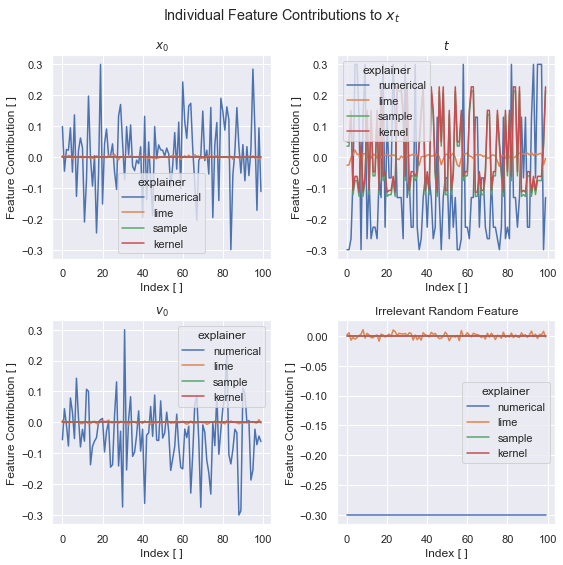

In [42]:
f, axs = plt.subplots(2, 2, figsize = (8,8), gridspec_kw = dict(width_ratios = [4,4]))

sns.lineplot(x=individual_df_xt.index, y="v0",
             hue="explainer", data=individual_df_xt, ax=axs[1,0])
axs[1,0].set_title(r"$v_0$")
axs[1,0].set_xlabel('Index [ ]')
axs[1,0].set_ylabel('Feature Contribution [ ]')

sns.lineplot(x=individual_df_xt.index, y="t",
             hue="explainer", data=individual_df_xt, ax=axs[0,1])
axs[0,1].set_title(r"$t$")
axs[0,1].set_xlabel('Index [ ]')
axs[0,1].set_ylabel('Feature Contribution [ ]')


sns.lineplot(x=individual_df_xt.index, y="random",
             hue="explainer", data=individual_df_xt, ax=axs[1,1])
axs[1,1].set_title(r"Irrelevant Random Feature")
axs[1,1].set_xlabel('Index [ ]')
axs[1,1].set_ylabel('Feature Contribution [ ]')


sns.lineplot(x=individual_df_xt.index, y="x0",
             hue="explainer", data=individual_df_xt, ax=axs[0,0])
axs[0,0].set_title(r"$x_0$")
axs[0,0].set_xlabel('Index [ ]')
axs[0,0].set_ylabel('Feature Contribution [ ]')

f.suptitle(r"Individual Feature Contributions to $x_t$")

f.tight_layout()
f.savefig("Images/feature_contributions_xt_sorted_by"+feature+".svg", dpi='figure')


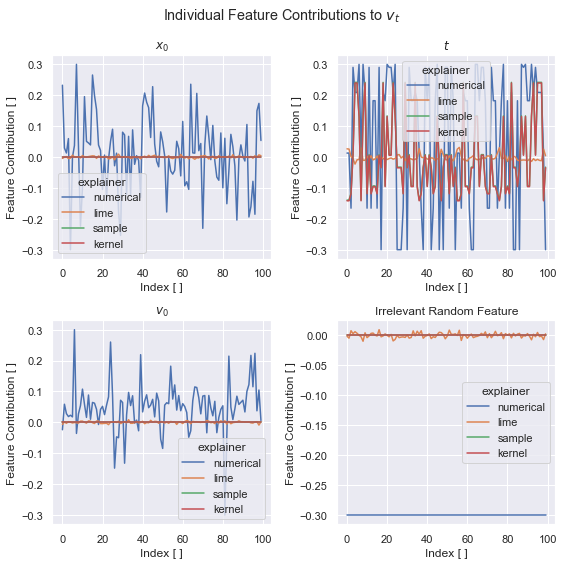

In [43]:
f, axs = plt.subplots(2, 2, figsize = (8,8), gridspec_kw = dict(width_ratios = [4,4]))

sns.lineplot(x=individual_df_vt.index, y="v0",
             hue="explainer", data=individual_df_vt, ax=axs[1,0])
axs[1,0].set_title(r"$v_0$")
axs[1,0].set_xlabel('Index [ ]')
axs[1,0].set_ylabel('Feature Contribution [ ]')

sns.lineplot(x=individual_df_vt.index, y="t",
             hue="explainer", data=individual_df_vt, ax=axs[0,1])
axs[0,1].set_title(r"$t$")
axs[0,1].set_xlabel('Index [ ]')
axs[0,1].set_ylabel('Feature Contribution [ ]')


sns.lineplot(x=individual_df_vt.index, y="random",
             hue="explainer", data=individual_df_vt, ax=axs[1,1])
axs[1,1].set_title(r"Irrelevant Random Feature")
axs[1,1].set_xlabel('Index [ ]')
axs[1,1].set_ylabel('Feature Contribution [ ]')


sns.lineplot(x=individual_df_vt.index, y="x0",
             hue="explainer", data=individual_df_vt, ax=axs[0,0])
axs[0,0].set_title(r"$x_0$")
axs[0,0].set_xlabel('Index [ ]')
axs[0,0].set_ylabel('Feature Contribution [ ]')

f.suptitle(r"Individual Feature Contributions to $v_t$")

f.tight_layout()
f.savefig("Images/feature_contributions_vt_sorted_by"+feature+".svg", dpi='figure')

Aggregated Plot

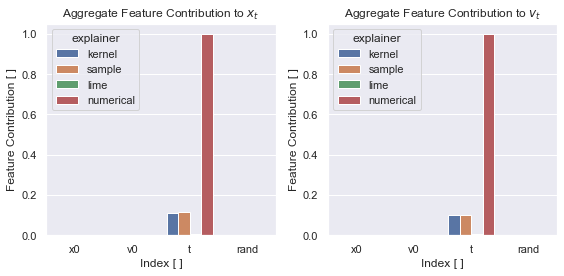

In [32]:
f, axs = plt.subplots(1, len(labels), figsize = (8,4), gridspec_kw = dict(width_ratios = [4,4]))

sns.barplot(data = aggregated_df, x = aggregated_df.index, 
            y = aggregated_df['xt'], ax=axs[0], hue='explainer')

sns.barplot(data = aggregated_df, x = aggregated_df.index, 
            y = aggregated_df['vt'], ax=axs[1], hue='explainer')

axs[0].set_title(r"Aggregate Feature Contribution to $x_t$")
axs[0].set_xlabel('Index [ ]')
axs[0].set_ylabel('Feature Contribution [ ]')

axs[1].set_title(r"Aggregate Feature Contribution to $v_t$")
axs[1].set_xlabel('Index [ ]')
axs[1].set_ylabel('Feature Contribution [ ]')

f.tight_layout()
f.savefig("Images/all_aggregated_sorted_by"+feature+".svg", dpi='figure')
